<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigned by : Jaime Ruiz 

Solution by : Natnael Mengistu

Use case:   You are the junior data scientist in a large team.  Your responsibilities include preprocessing all of the data and presenting the modeling team with a dataset suitable for the model they will create.   You have absolute freedom to transform the data, however you must have good reasons and you should communicate them.   


Perform EDA and initial Cleaning on the dataset provided. Justify all choices and produce a document to be handed over to the modeling team that includes all plots, charts and deletions. Include a one paragraph description of your cleaned dataset and present findings to the modeling team.

In [ ]:
import pandas as pd # import library to read data into dataframe
#pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)


In [ ]:

from google.colab import files
 
 
uploaded = files.upload()

Saving raw_house_data.csv to raw_house_data.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['raw_house_data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df2

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None


Checking if zip code is a 5 digit integer

In [ ]:
df2.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [ ]:
df2.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [ ]:
df2.shape

(5000, 16)

In [ ]:
df2.isnull().sum(axis = 0)

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

Checks if elements in Zipcode are five digit

In [ ]:
Hello = []
for i in df2.zipcode:
  #print(i)
  if len(str(i)) != 5:
    Hello.append[i]

print(len(Hello))

0


Checks for Duplicates

In [ ]:
duplicate_check = df2.drop_duplicates()
duplicate_check.shape

(5000, 16)

Checks how many of the columns are NaN

In [ ]:
 df2.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

We drop NaN values and find best ways to Replace them

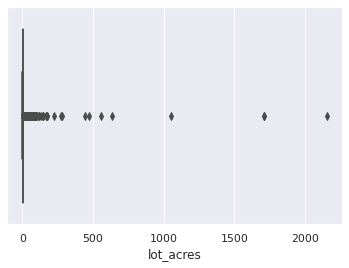

In [ ]:
df3 = df2.dropna()

sns.boxplot(x=df3['lot_acres'])

#print(df3['lot_acres'].describe())

x = df3['lot_acres'].mode()

df2['lot_acres'] = df2['lot_acres'].fillna(x)



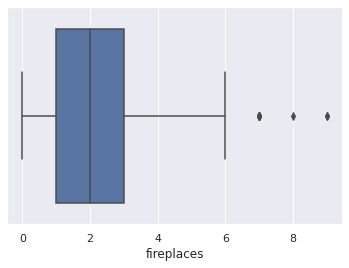

In [ ]:
sns.boxplot(x=df3['fireplaces'])

y = df3['fireplaces'].mean()

df2['fireplaces'] = df2['fireplaces'].fillna(y)

Now we have replaced all NaN feilds 

In [103]:
 df2.isnull().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [96]:
df2.shape


(5000, 16)

Replacing all None's with 0

In [106]:
df3 = df2.replace('None', 0)

df3

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,0,0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0


1 acre - 43560 square feet

Lot in acres to sqrt_ft by multipying with 43560

In [110]:
df3['lot_acres'] = df3['lot_acres'].apply(lambda x: x*43560)

df3

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,4.087158e+12,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,3.238987e+12,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,3.238987e+12,10482.00,1997,2,3,0,0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0
3,21919321,4500000.0,85646,-111.035925,31.645878,1.208065e+12,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0
4,21306357,3411450.0,85750,-110.813768,32.285162,6.090890e+09,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,9.449419e+09,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0
4996,21908591,550000.0,85750,-110.858556,32.316373,2.694413e+09,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,2.288353e+10,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.916448e+09,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0


In [139]:
df3['HOA'] = pd.to_numeric(df3['HOA'])

df3.dtypes


MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [141]:
summary = df3.describe()
summary

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,fireplaces,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.00000,5000.000000,5000.000000,4438.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,8.830793e+09,9.402828e+03,1992.32800,3.933800,1.885228,103.043058
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,9.797371e+10,1.729385e+05,65.48614,1.245362,1.133733,547.397960
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000e+00,0.000000e+00,0.00000,1.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,1.100535e+09,4.803605e+03,1987.00000,3.000000,1.000000,8.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,1.878499e+09,6.223760e+03,1999.00000,4.000000,2.000000,56.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,3.320579e+09,8.082830e+03,2006.00000,4.000000,3.000000,135.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,4.087158e+12,1.221508e+07,2019.00000,36.000000,9.000000,20000.000000


In [142]:
df3.groupby('zipcode')['HOA'].describe()

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
85118,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
85192,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85541,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
85601,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85602,2.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
85603,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85605,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
85609,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
85610,2.0,42.000000,0.000000,42.00,42.0000,42.000,42.0000,42.00


(array([2.000e+00, 7.600e+01, 2.498e+03, 1.263e+03, 5.170e+02, 2.210e+02,
        1.700e+02, 9.500e+01, 5.800e+01, 2.700e+01, 2.700e+01, 1.600e+01,
        6.000e+00, 8.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 169000.        ,  340033.33333333,  511066.66666667,
         682100.        ,  853133.33333333, 1024166.66666667,
        1195200.        , 1366233.33333333, 1537266.66666667,
        1708300.        , 1879333.33333333, 2050366.66666667,
        2221400.        , 2392433.33333333, 2563466.66666667,
        2734500.        , 2905533.33333333, 3076566.66666667,
        3247600.        , 3418633.33333333, 3589666.66666667,
        3760700.        , 3931733.33333333, 4102766.66666667,
        4273800.        , 4444833.33333333, 4615866.66666667,
        4786900.        , 4957933.33333333, 5128966.66666667,
        

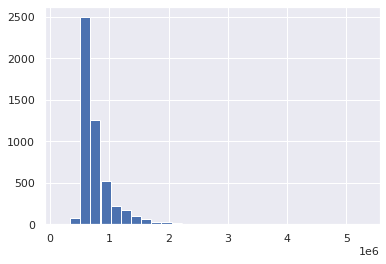

In [144]:
plt.hist(df3['sold_price'], bins = 30)

<AxesSubplot:>

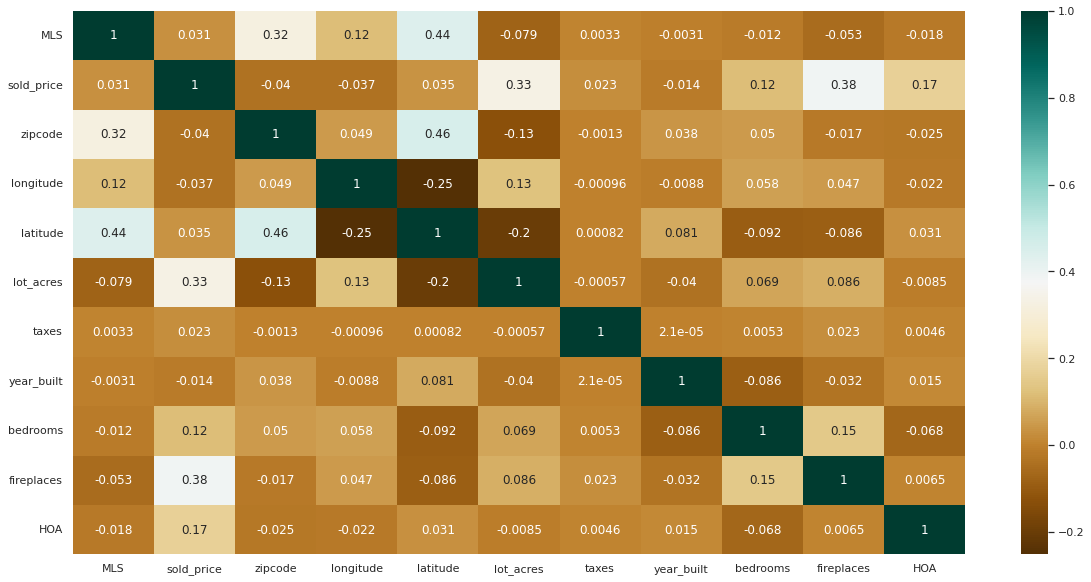

In [148]:
plt.figure(figsize=(20,10))
c = df3.corr()
sns.heatmap(c , cmap="BrBG", annot=True)

In [128]:
print(set(df3['floor_covering'].values))

{0, 'Carpet, Ceramic Tile, Other: Italian Tile', 'Carpet, Natural Stone, Other: Canterra Stone', 'Mexican Tile, Other', 'Carpet, Other: Porcelain Tile', 'Concrete, Wood, Other: Porcelain tile', 'Carpet, Other: Porcelain', 'Concrete, Other: Stained concrete', 'Carpet, Natural Stone, Wood, Other: Travertine', 'Mexican Tile, Other: Porcelain', 'Natural Stone, Wood, Other: Organic Wool Carpet', 'Ceramic Tile, Mexican Tile, Other', 'Carpet, Other: porcelain tile', 'Concrete, Other: Polished Concrete', 'Carpet, Ceramic Tile, Concrete, Natural Stone', 'Ceramic Tile, Mexican Tile, Natural Stone', 'Carpet, Concrete, Other: Rojo Concrete Overla', 'Carpet, Ceramic Tile, Concrete, Other', 'Ceramic Tile, Other: vinyl planks', 'Carpet, Laminate, Mexican Tile, Other: Travertine', 'Concrete, Wood, Other: Marble', 'Carpet, Natural Stone, Other: Tile/Powder Rm', 'Carpet, Concrete, Natural Stone, Wood', 'Carpet, Natural Stone, Other: Brick Floor', 'Carpet, Ceramic Tile, Indoor/Outdoor', 'Carpet, Wood, Ot

In [102]:
print(set(df3['kitchen_features'].values))

{'Dishwasher, Pantry: Walk-In, Refrigerator, Appliance Color: Stainless, Countertops: Slab Granite, Microwave: Builkt-in', 'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Island, Pantry: Walk-In, Appliance Color: Stainless, Countertops: Granite, Microwave: Built-in, Oven: Built-in', 'Dishwasher, Double Sink, Garbage Disposal, Refrigerator, Appliance Color: Stainless, Countertops: Quartz, Microwave: Stainless, Oven: Double', 'Dishwasher, Double Sink, Freezer, Garbage Disposal, Gas Range, Lazy Susan, Refrigerator, Appliance Color: Stainless, Countertops: Granite, Microwave, Oven', 'Dishwasher, Double Sink, Electric Range, Garbage Disposal, Indoor Grill, Pantry: Cabinet, Appliance Color: Stainless, Countertops: Quartz, Oven: Stainless', 'Dishwasher, Electric Range, Garbage Disposal, Gas Range, Island, Lazy Susan, Pantry: Walk-In, Refrigerator, Warming Drawer, Appliance Color: Stainless, Countertops: solid surface, Microwave: yes, Oven: convection', 'Dishwasher, Double Sink, Garbage

The housing data provided has a shape of 5000 * 6 , with Float , integer and object data type columns.I used Pandas , Numpy , Matlabplot and seaborn to clean, preview and do some Explanatory analysis. To clean the data the data I replaced NaN files with the mean and median as needed and replaced None with 0. I changed some columns to a different data type in order to make changes. I made sure every zipcode was five digits long and converted acres to square feet for future cases that involve those two columns.